# 05-2 선, 막대 그래프 그리기

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/hg-da/blob/main/05-2.ipynb"><img src="https://jupyter.org/assets/share.png" width="61" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-da/blob/main/05-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 연도별 발행 도서 개수 구하기

In [1]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 120MB/s] 


'ns_book7.csv'

In [2]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [3]:
count_by_year = ns_book7['발행년도'].value_counts()
count_by_year

,count
발행년도,
2012,18601
2014,17797
2009,17611
2011,17523
2010,17503
...,...
2548,1
1948,1
1967,1


In [4]:
count_by_year = count_by_year.sort_index()
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2551,1
2552,2
2559,1


In [5]:
count_by_year = count_by_year[count_by_year.index <= 2030]
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2020,11834
2021,1255
2025,1


## 주제별 도서 개수 구하기

In [6]:
import numpy as np

def kdc_1st_char(no):
    if no is np.nan:
        return '-1'
    else:
        return no[0]

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

,count
주제분류번호,
8,108643
3,80767
5,40916
9,26375
6,25070
1,22647
-1,16978
7,15836
4,13688


## 선 그래프 그리기

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

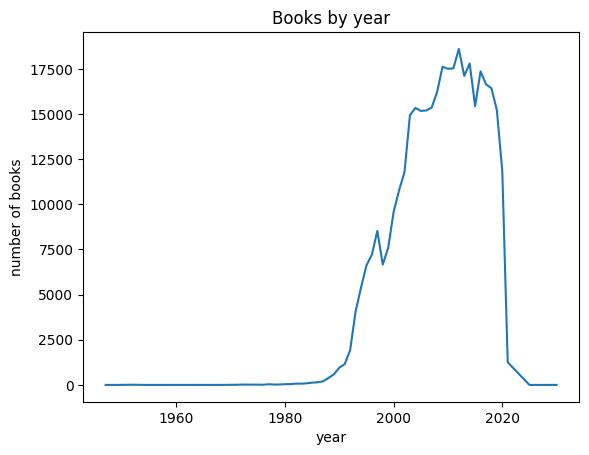

In [8]:
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

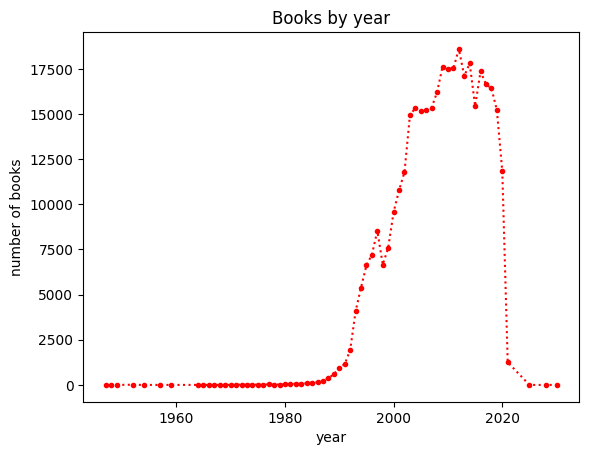

In [9]:
plt.plot(count_by_year, marker='.', linestyle=':', color='red')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

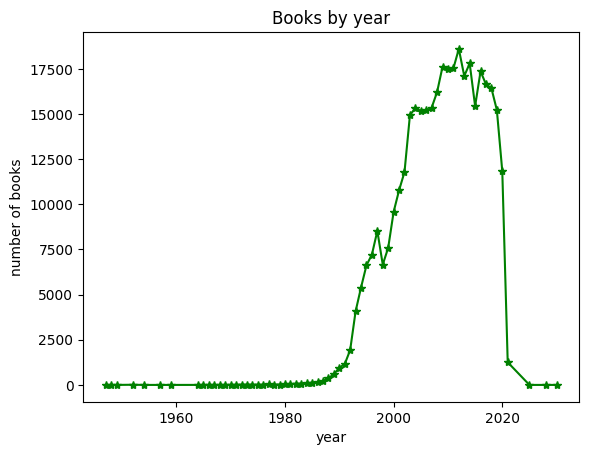

In [10]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

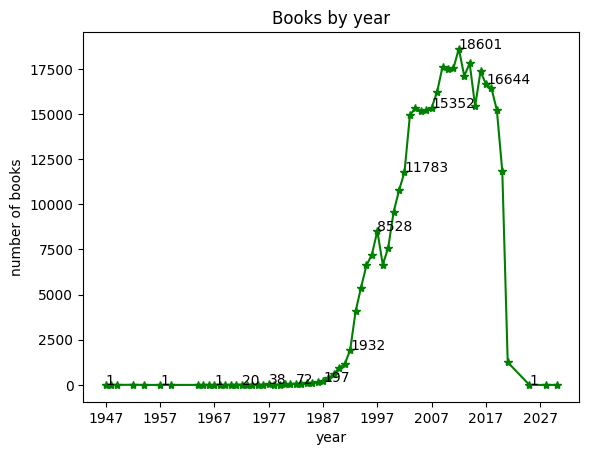

In [11]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val))
plt.show()

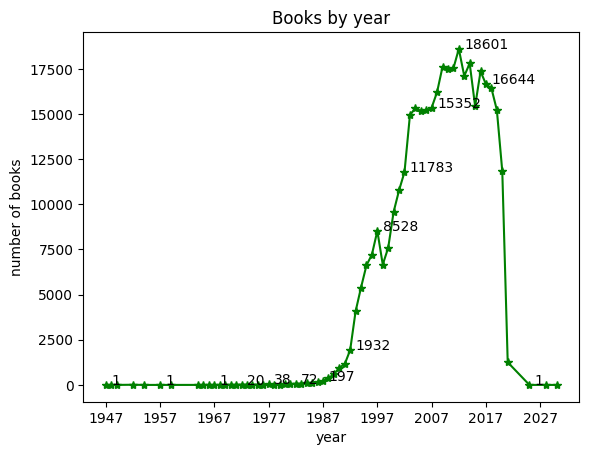

In [12]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(idx+1, val+10))
plt.show()

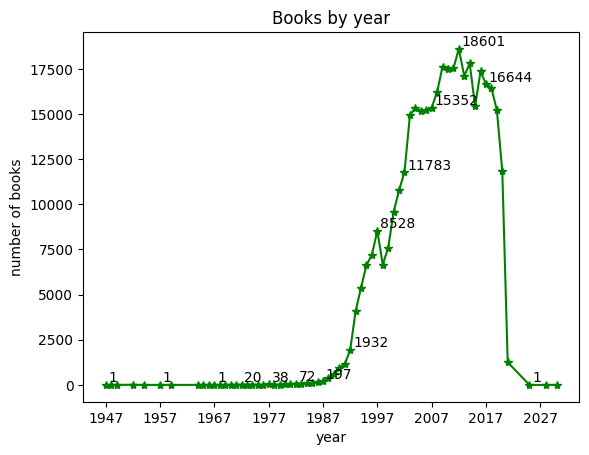

In [13]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(2, 2), textcoords='offset points')
plt.show()

## 막대 그래프 그리기

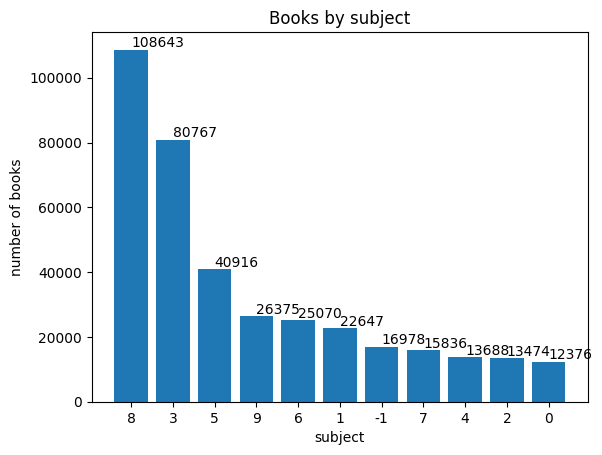

In [14]:
plt.bar(count_by_subject.index, count_by_subject.values)
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points')
plt.show()

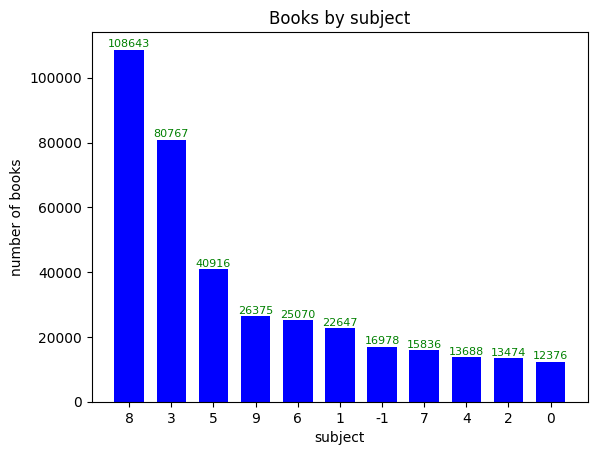

In [15]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points',
                 fontsize=8, ha='center', color='green')
plt.show()

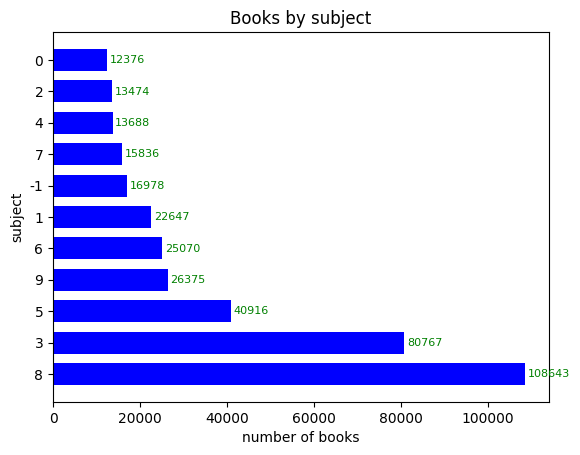

In [16]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2, 0), textcoords='offset points',
                 fontsize=8, va='center', color='green')
plt.show()

## 이미지 출력하고 저장하기

In [17]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    # 샘플 이미지를 다운로드합니다.
    !wget https://bit.ly/3wrj4xf -O jupiter.png

--2025-11-25 02:57:59--  https://bit.ly/3wrj4xf
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/rickiepark/hg-da/main/jupiter.png [following]
--2025-11-25 02:57:59--  https://raw.githubusercontent.com/rickiepark/hg-da/main/jupiter.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3287363 (3.1M) [image/png]
Saving to: ‘jupiter.png’

jupiter.png         100%[===================>]   3.13M  --.-KB/s    in 0.07s   

2025-11-25 02:57:59 (42.3 MB/s) - ‘jupiter.png’ saved [3287363/3287363]



In [18]:
img = plt.imread('jupiter.png')
img.shape

(1561, 1646, 3)

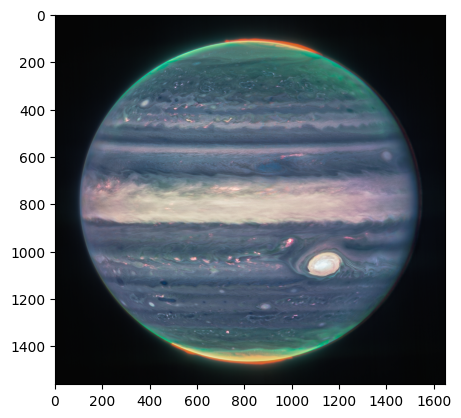

In [19]:
plt.imshow(img)
plt.show()

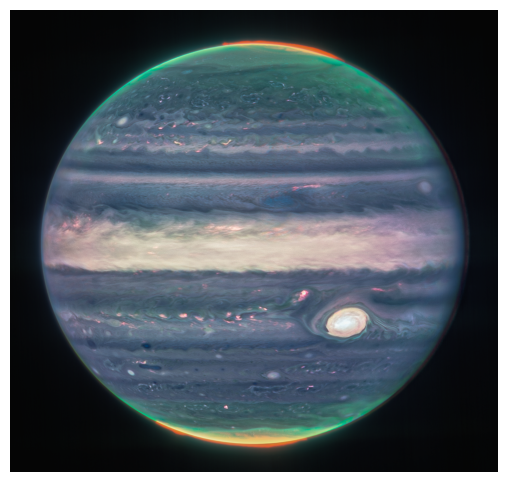

In [20]:
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

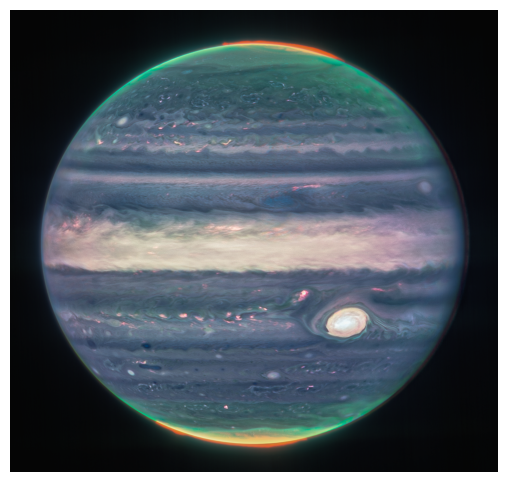

In [21]:
from PIL import Image

pil_img = Image.open('jupiter.png')
plt.figure(figsize=(8, 6))
plt.imshow(pil_img)
plt.axis('off')
plt.show()

In [22]:
import numpy as np

arr_img = np.array(pil_img)
arr_img.shape

(1561, 1646, 3)

In [23]:
plt.imsave('jupiter.jpg', arr_img)

## 그래프를 이미지로 저장하기

In [24]:
plt.rcParams['savefig.dpi']

'figure'

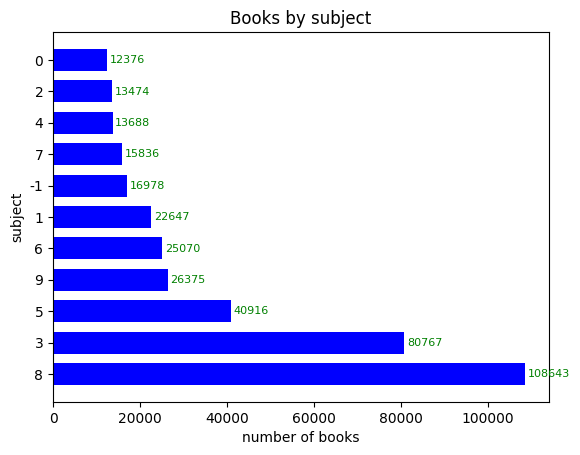

In [25]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2, 0), textcoords='offset points',
                 fontsize=8, va='center', color='green')
plt.savefig('books_by_subject.png')
plt.show()

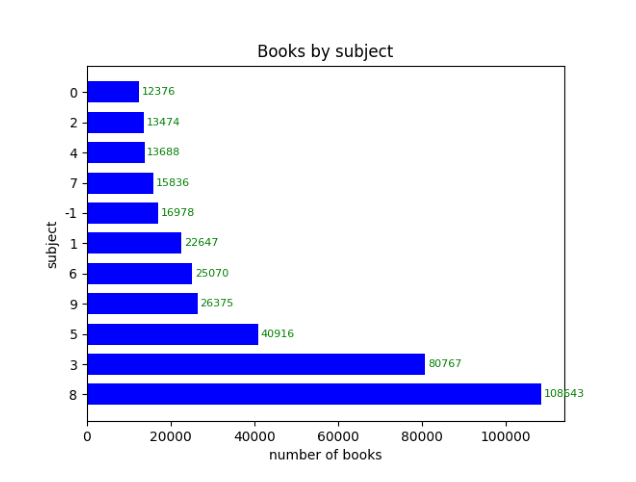

In [26]:
pil_img = Image.open('books_by_subject.png')

plt.figure(figsize=(8, 6))
plt.imshow(pil_img)
plt.axis('off')
plt.show()